# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [19]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
#print data
#print "\nFEATURES:", features
#print "\nPRICES:", prices


# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [20]:
# TODO: Minimum price of the data
minimum_price = min(prices)

# TODO: Maximum price of the data
maximum_price = max(prices)

# TODO: Mean price of the data
#sum_price = sum(prices)
#count_price = prices.shape[0]
#mean_price1 = sum_price/count_price
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_popln = np.std(prices)
std_price = np.std(prices, ddof=1)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
#print sum_price, count_price, mean_price1
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
#print "Standard deviation of population: ${:,.2f}".format(std_popln)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

- As RM value (av # of rooms) __increases__ MEDV value (price) can be expected to __increase__, since higher RM value indicates more rooms in houses in the area, indicating larger houses which are likely to be higher price;

- As LSTAT (% of homeowners in neighbourhood considered 'lower class') __increases__ MEDV (price) can be expected to __decrease__, since less affluent homeowners are likely to reside in areas where house prices are lower, hence more affordable;

- As PTRATIO (student-teacher ratio) __increases__ (i.e. more student per teacher or larger class sizes) MEDV (price) might be expected to __decrease__, since higher class sizes implies a lower quality of schooling in the area while better quality schools (as suggested by lower class sizes) tends to push up house prices*.

_*This tendency is true in UK (particularly suburban areas), although this may be a localised effect which is not applicable to Boston or USA._

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [22]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    #score = r2_score(y_true, y_predict, multioutput='variance_weighted')
    #score = r2_score(y_true, y_predict, multioutput='uniform_average')
    #score = r2_score(y_true, y_predict, multioutput='raw_values')
    
    # Return the score
    return score

#y_true = [3, -0.5, 2, 7]
#y_predict = [2.5, 0.0, 2, 8]
#y_true = [[0.5, 1], [-1, 1], [7, -6]]
#y_predict = [[0, 2], [-1, 2], [8, -5]]
#score = performance_metric(y_true,y_predict)
print score


0.922855648536


### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [23]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

BEFORE calculating R^2: From a cursory review of the predicted and actual values in the table, we can see that the absolute variance between prediction and actual is small in most cases: (0.5, 0.5, 0.1, 0.8, 1.1). This gives a mean sum of squares error score of 0.6 indicating a low error rate.

However, I would caveat this answer by noting that: (i) the sample size is very small so may not be representative of a wider population, and (ii) without more description/narrative about the data points it is difficult to draw binding conclusions.

AFTER calculating R^2: The R^2 calculated at 0.92 which confirms my above view that the predictions show high accruacy (1.0 being perfect accuracy). Hence the prediction model which returned these results would be expected to generalise well to unseen data.


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [24]:
# TODO: Import 'train_test_split'
from sklearn import cross_validation


# TODO: Shuffle and split the data (features, prices) into training and testing subsets
#X_train, X_test, y_train, y_test = (None, None, None, None)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        features, prices, test_size=0.2, random_state=25)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
#print "\nX_TRAIN:", X_train
#print "\nX_TEST:", X_test
#print "\ny_TRAIN:", y_train
#print "\ny_TEST:", y_test

# Success
print "Training and testing split was successful."

(391, 3) (391L,)
(98, 3) (98L,)
Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

The benefit of splitting a dataset into training and test datasets when using a learning algorithm is to provide data sufficient to allow the algorithm to learn on (training data) but with some independent data held back in order to test the learning algorithm for accuracy and goodness of fit. This ensures the algorithm is performing optimally before applying it to new unseen data.


If we simply ran the learning algorithm against all of the available sample data without performing this independent validation process, there is a danger of algorithm overfitting, that is perfectly fit the sample but be unable to generalise to the general population.


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

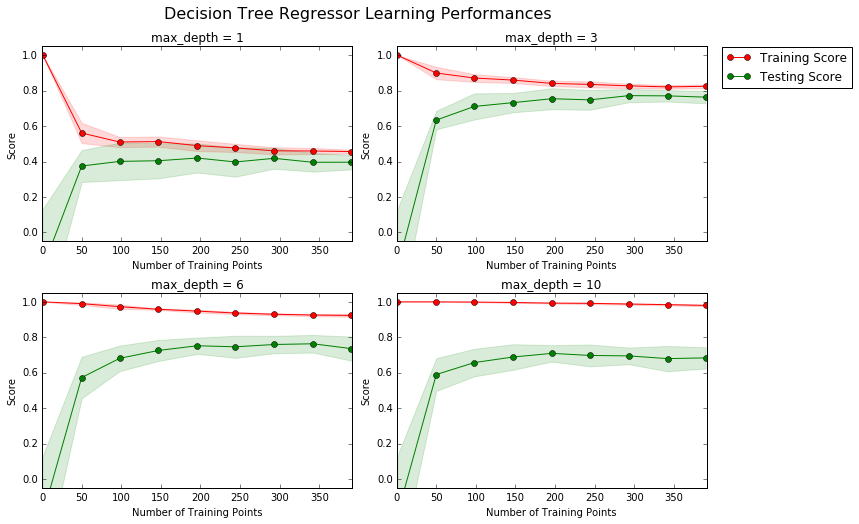

In [25]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Looking at the model with maximum depth of 10, the training curve can be seen to be very flat and at a very high accuracy score of almost 1 (near perfect accuracy). This pattern is observed regardless of the number of training datapoints added. Similarly the test curve shows a relatively flat curve but at a much lower accruacy score, never exceeding c. 70% accuracy despite the addition more test datapoints. The two curves never converge.

This is a classis graph of an overly complex model which overfits to the training data but, despite adding more training datapoints, will never be able to generalise to the independent test dataset which scores a consitently low accuracy score.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

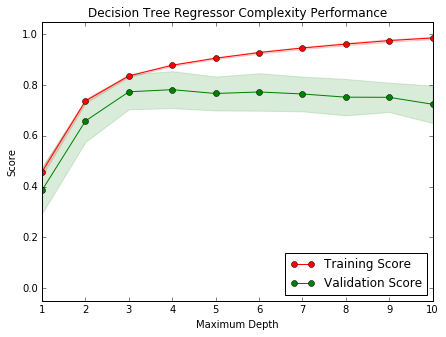

In [26]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

Training the model at a maximum depth of 1 results in well-converged training and test scores, but the learner's performance (R^2 score) on the training set is very low at c. 0.4, or 40% accuracy. This indicates the model is over-simplified and suffers from bias or underfitting.


When the model is trained at a maximum depth of 10, there is a large divergence between the training and test scores. Here, despite good performance on the training set (R^2 near 1), the test set is not performing well and has a much higher error rate. This indicates the model at this depth is not generalising well to the unseen test data, and is suffering from high variance or overfitting.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

From the graph it appears the model which maximises performance (highest R^2 score) and generalises best to unseen data is with a maximum depth of 3. This is because, at max_depth = 3, the training and test curves are converged (minimal gaps indicate the model is generalising well to the test data), and also this model is sufficiently complex to reduce the errors seen where max_depth was 1 or 2 (as evidenced by the higher R^2 score). This is also confirmed by the R^2 score on the test complexity curve tailing off where max_depth > 3.


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Grid Search is a validation technique for model optimisation which provides a visual tool to allow identification of bias and variance errors and find optimal parameters for the learning algorithm (training size and model complexity). The technique plots a 3-dimensional complexity graph in an xyz-space, which represents a series of learning curves (training size V learning curve score, xy) for various model complexities (z-axis). From this plot, one can see visually how model complexity improves (or not) the learning algorithm's performance.


### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

The k-fold cross-validation technique is a method where the sample dataset is split randomly into k number of buckets or 'folds'. These k folds are then split into training and test sets, with (k-1) folds becoming the training data for learning, while the final kth fold acting as test data for model validation. The learning algorithm cycles through the training-test splits k times so that all datapoints act as both training data and test data at some point in the cycle, and takes the average of all results from all k learning cycles.

Grid search and other cross-validation techniques require randomisation of the data before splitting into training and test sets to remove any problems arising from ordered data. But, depending on which random data split (training v test) we use, different results are obtained each time because each unique training/test split provides a slightly different set of training data on which the algorithm will learn. As a result, we can't be sure we've got the most reliable results for any given train-test split, while outliers in the data may be more likely to skew results.

The k-fold cross-validation technique overcomes this problem by cycling through the k folds of data, using all data points for both training and testing, and taking an average overall result. This leads to learning which is more accurate and avoids the possibility of rogue datapoints skewing the results.


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [27]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
#from sklearn.cross_validation import ShuffleSplit    ## imported to fix issue with initialising ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV        ## imported to fix issue with global 'GridSearchCV' not recognised

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)    ## updated parameter name n_splits to n_inter for v0.17

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = { 'max_depth': range(1,11) }

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [28]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
print 'Optimal Model:\n', reg, '\n'

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Optimal Model:
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best') 

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The Grid Search method applied to the decision tree regressor calculates a maximum depth of 4 to optimise the model. This is higher than I suggested in Question 6 when viewing the complexity graph by eye.


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [85]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3
#print client_data['


# Descriptive statistics for RM, LSTAT, PTRATIO (no. of rooms)
print "Descriptive Statistics:\n", len("Descriptive Statistics:")*"-"
print "Features : min/max/mean/median (to 1 d.p.)"
for feature in features:
    min_f = min(data[feature])
    max_f = max(data[feature])
    mean_f = np.mean(data[feature])
    median_f = np.median(data[feature])
    print feature, ": {:,.1f} {:,.1f} {:,.1f} {:,.1f}".format(min_f, max_f, mean_f, median_f)
print "\nPrices (to nearest whole $)"
print "Minimum price: ${:,.0f}".format(minimum_price)
print "Maximum price: ${:,.0f}".format(maximum_price)
print "Mean price: ${:,.0f}".format(mean_price)
print "Median price ${:,.0f}".format(median_price)
print "Standard deviation of prices: ${:,.0f}".format(std_price)
print "\n"


# Show predictions
print "Predicted Prices:\n", len("Predicted Prices:")*"-"
for i, price in enumerate(reg.predict(client_data)):
    #print i, price
    #print reg.predict(client_data)
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)



Descriptive Statistics:
-----------------------
Features : min/max/mean/median (to 1 d.p.)
RM : 3.6 8.4 6.2 6.2
LSTAT : 2.0 38.0 12.9 11.7
PTRATIO : 12.6 22.0 18.5 19.1

Prices (to nearest whole $)
Minimum price: $105,000
Maximum price: $1,024,800
Mean price: $454,343
Median price $438,900
Standard deviation of prices: $165,340


Predicted Prices:
-----------------
Predicted selling price for Client 1's home: $409,395.00
Predicted selling price for Client 2's home: $195,416.67
Predicted selling price for Client 3's home: $950,425.00


**Answer: **

Recommended price each client should sell his/her home at (based on Predicted Selling Prices):

Client | Rooms | PovLev | S-T ratio | Predicted SP ($)
--- | ---:| ---:| ---:| ---:
**1** | 5 | 17 | 15 | **409,395.00**
**2** | 4 | 32 | 22 | **195,416.67**
**3** | 8 | 3 | 12 | **950,425.00**

  
  
These prices seem reasonable for their respective features because they are in line with intuitive expectations for the given features (per Question 1) and correspond well to the various descriptive statistics calculated for the sample dataset (refer table below).

Client 3's house (predicted selling price \$950,425) has 8 rooms (which is close to the maximum no. of rooms per the sample dataset of 8.4), a student-teacher ratio of 12:1 (in line with sample minimum of 12.6:1) and a very low level of neighbourhood poverty at 3% (sample minimum 2%) . All these features suggest a selling price close to, but slightly less than, the sample dataset's maximum price of \$1,024k. This is also in keeping with our intuition that houses with more rooms, or near to schools with lower student-teacher ratios, or in areas with low poverty levels, will sell for higher prices.

Conversely, client 2's home (predicted selling price \$195,417) has 4 rooms (near to sample minimum of 3.6), a high student-teacher ratio of 22:1 (equaling sample max 22:1) and a high poverty level in the area of 32% (sample max 38%). All these suggest a fairly low selling price, but slightly more than the sample min (\$105k).

Client 1's house (predicted selling price \$409,395) has features a little  below the sample mean for no. of rooms and S:T ratio, and slightly above the sample mean poverty level. This suggests a selling price close to, but below, the sample mean of \$454,343.

  
  
Descriptive Statistics for Sample Dataset (Features & Prices):

 | Rooms | PovLev | S-T ratio | Price ($)
--- | ---:| ---:| ---:| ---: 
**Min** | 3.6 | 2.0 | 12.6 | 105,000
**Max** | 8.4 | 38.0 | 22.0 | 1,024,800
**Mean** | 6.2 | 12.9 | 18.5 | 454,343
**Median** | 6.2 | 11.7 | 19.1 | 438,900





### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [86]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The 10 trials produce predicted selling prices for client 1's home ranging from \$351,778 to \$420,622, with a mean predicted price of \$404,474 and range (or variance) in predictions of \$69,045. (All monetary values rounded to nearest $.) At 17% of the mean, this variance appears high and suggests the model is not very robust.

The sample dataset, which is from the 1970s, is unlikely to provide a good representation of today's prices, even despite adjusting for market inflation (which may be inaccurate if applied as an average, hence not equally applicable to all house types and neighbourhoods).

There are also likely to be other factors which account for house prices in addition to the features available in the sample data and used in the model, such as size of garden, neighbourhood crimes rates, access to transport networks and amenities, and so on.

As such, I recommend the model should not be relied upon for advising clients directly on selling prices since it's accuracy can't be guaranteed and may result in the agent under-valuing homes by up to c. 17%.

However, it could still prove useful as a general 'estimating' tool. For example, to assess which neighbourhoods the agent might target for additional marketing, since they could maximise sales commissions and profitability by targeting neighbourhoods where higher prices were expected.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.